In [2]:
import pandas as pd

In [3]:
weather = pd.read_csv("Data/Weather.csv")

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
Date    731 non-null object
PRCP    728 non-null float64
SNOW    727 non-null float64
TMAX    730 non-null float64
TMIN    730 non-null float64
TAVG    730 non-null float64
AWND    731 non-null float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [5]:
weather.describe()

,PRCP,SNOW,TMAX,TMIN,TAVG,AWND
count,728.000000,727.000000,730.000000,730.000000,730.000000,731.000000
mean,2.678846,1.420908,20.596712,9.550137,18.229726,3.749248
std,6.983797,14.262455,10.993150,42.127156,74.095154,1.529915
min,0.000000,0.000000,-6.600000,-1096.700000,-10.600000,-4.100000
25%,0.000000,0.000000,12.200000,3.300000,7.900000,2.700000
50%,0.000000,0.000000,21.100000,10.600000,15.800000,3.500000
75%,1.000000,0.000000,29.400000,20.000000,24.600000,4.700000
max,69.900000,287.000000,128.900000,27.800000,2000.100000,10.200000


In [6]:
weather = weather.dropna(axis=0, how="any")

In [7]:
weather.describe()

,PRCP,SNOW,TMAX,TMIN,TAVG,AWND
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,2.697781,1.432732,20.656588,9.590291,18.321359,3.741470
std,7.012795,14.321167,11.024518,42.382666,74.549291,1.533736
min,0.000000,0.000000,-6.600000,-1096.700000,-10.600000,-4.100000
25%,0.000000,0.000000,12.200000,3.300000,7.900000,2.700000
50%,0.000000,0.000000,21.100000,11.100000,15.900000,3.500000
75%,1.000000,0.000000,29.400000,20.000000,24.600000,4.600000
max,69.900000,287.000000,128.900000,27.800000,2000.100000,10.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1081b77b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1082b6a20>]], dtype=object)

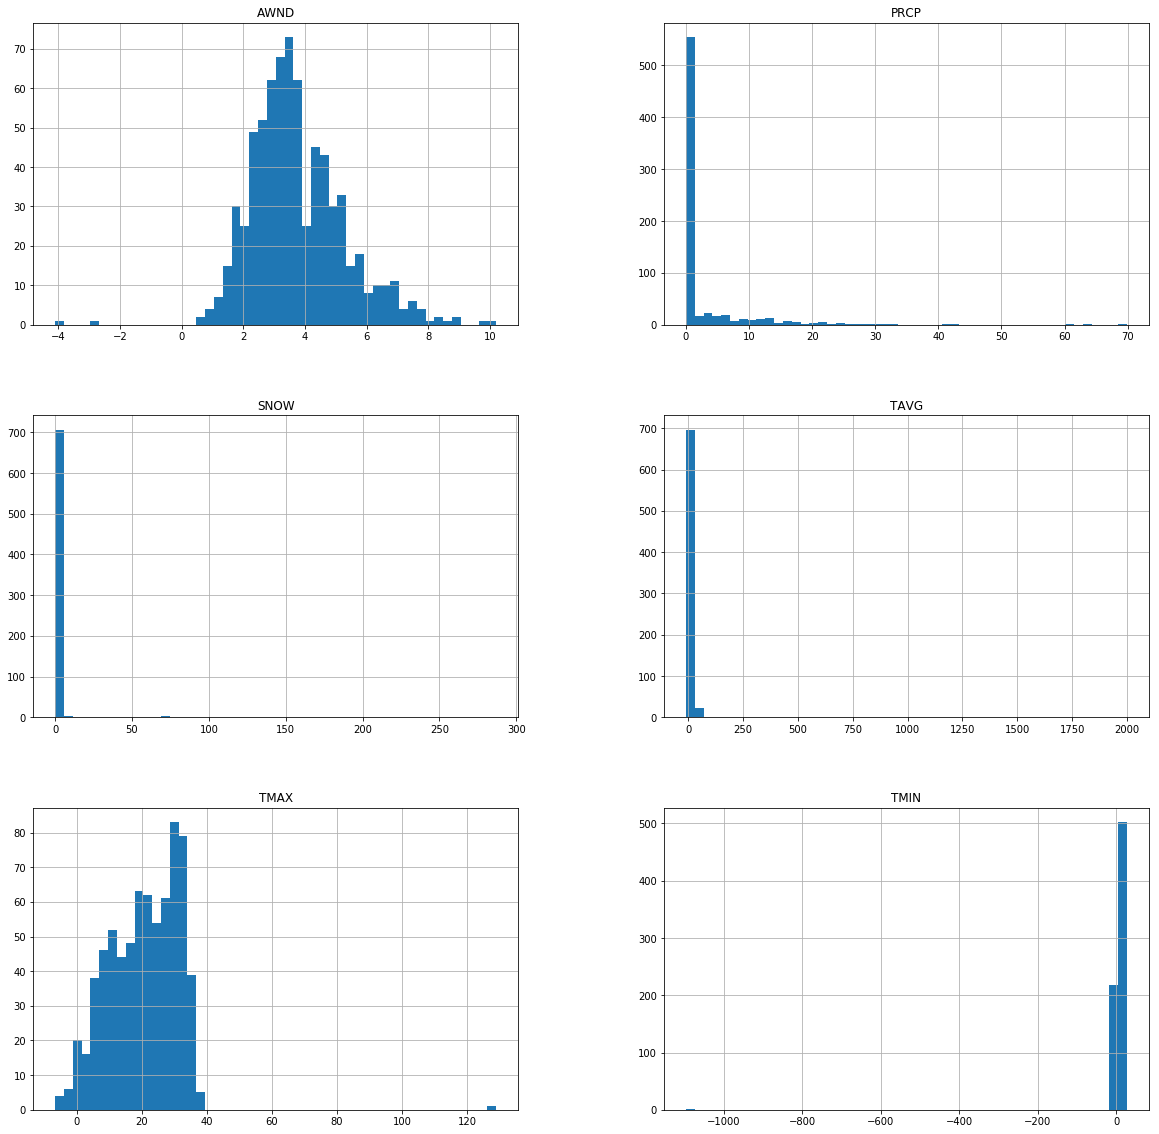

In [8]:
import matplotlib
%matplotlib inline
weather.hist(bins=50, figsize=(20,20))

In [9]:
weather = weather.drop(weather[weather.AWND<0].index)

In [10]:
weather = weather.drop(weather[weather.TMIN<-600].index)

In [11]:
weather = weather.drop(weather[weather.TMAX>100].index)

In [12]:
weather = weather.drop(weather[weather.TAVG>500].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106ef1198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109736ef0>]], dtype=object)

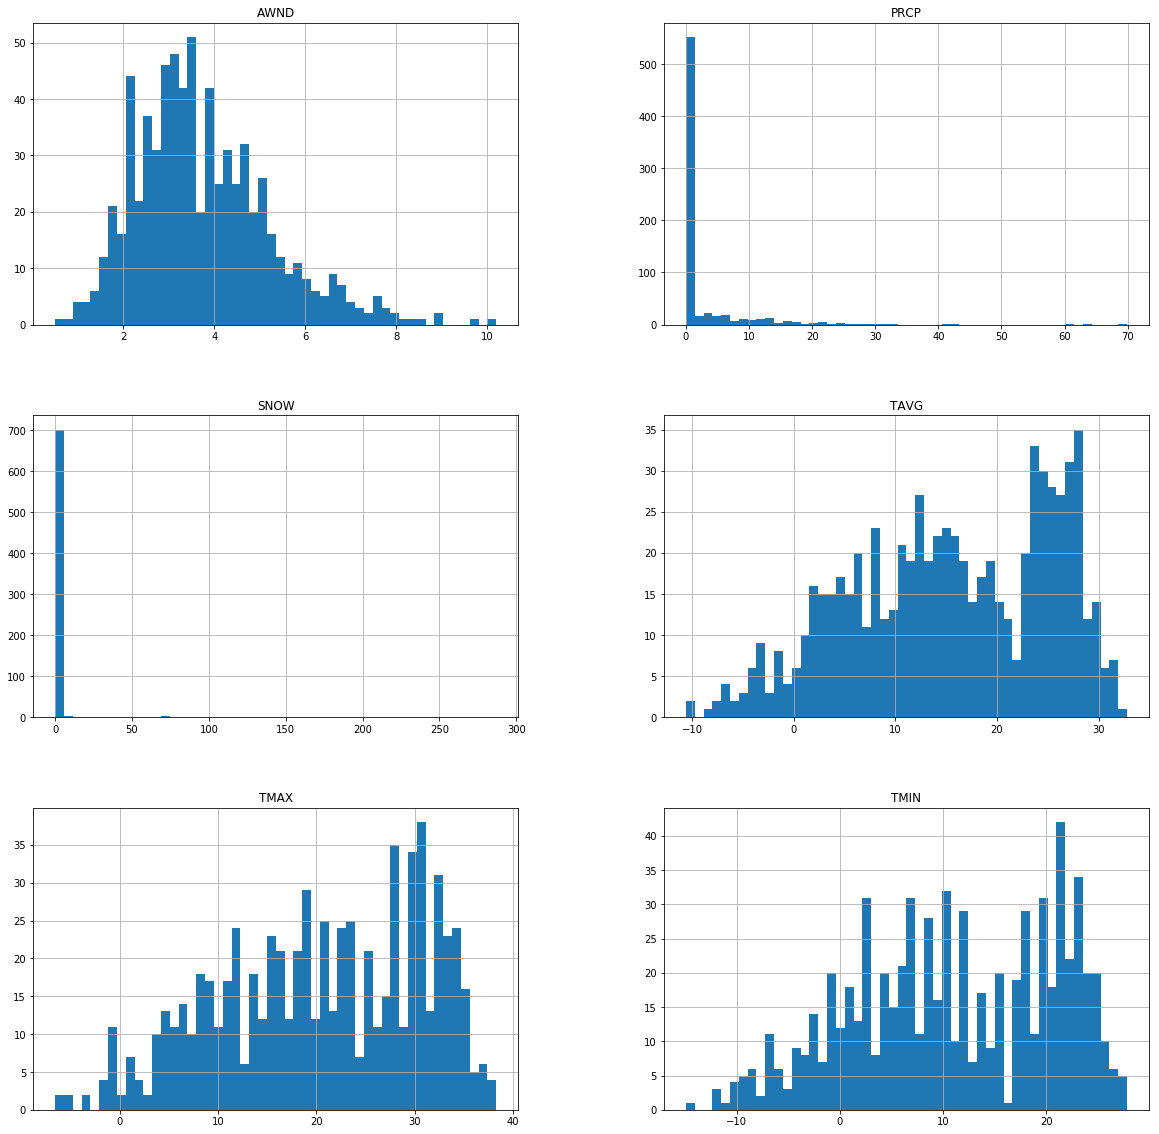

In [13]:
weather.hist(bins=50, figsize=(20,20))

In [14]:
weather["Date"] = pd.to_datetime(weather["Date"], format="%d/%m/%Y")

In [15]:
f = open("Data/Weather_Clean.csv","w")
f.write(weather.to_csv(index=False))
f.close()

In [16]:
weather_2 = pd.read_csv("Data/Weather_Clean.csv")
weather_2.head()

,Date,PRCP,SNOW,TMAX,TMIN,TAVG,AWND
0,2015-01-01,0.0,0.0,8.3,-2.7,1.7,3.7
1,2015-01-02,0.0,0.0,9.4,1.7,5.3,1.3
2,2015-01-03,12.7,0.0,5.6,1.1,4.0,1.5
3,2015-01-05,0.0,0.0,11.1,-1.6,7.8,6.4
4,2015-01-06,5.1,61.0,0.0,-4.3,-1.9,2.2
